For questions 1 to 4: 
- Please run import warnings; warnings.filterwarnings(‘ignore’) at the top of your code to avoid warnings from LightGBM related to feature names not being provided; this is done to keep your code clean and readable 
- Load the breast cancer dataset from scikit-learn; you can do this by running load_breast_cancer() from sklearn.datasets 
- The target variable here is whether the target has breast cancer or not; you can obtain this by using the .target attribute on your loaded data 
- You can acquire the predictors using the .data attribute on your loaded data 
- Using sklearn.model_selection.train_test_split(), split the data as follows:
    - Use an 80:20 train:test split
    - Set random_state = 9001 so that the results you obtain can be compared to ours 
    - Stratify the target feature labels so we have an equal distribution in both test and training sets (set stratify = y) 

Specifically, for questions 1, and 2: 
- Build a base random forest model using RandomForestClassifier() from sklearn.ensemble
    - Set class_weight = 'balanced'
    - Set random_state = 9001 so that the results you obtain can be compared to ours
    - Set n_estimators = 100
    - Set max_depth = 4
- Fit your model on the training data and evaluate it on the testing data 
- During evaluation, generate
    - A confusion matrix
    - A classification report; you can use classification_report() from sklearn.metrics to achieve this
    - The ROC AUC score; you can use roc_auc_score() from sklearn.metrics to achieve this 

Specifically, for questions 4 and 5: 
- Install LightGBM if you have not already done so
- You may use pip install lightgbm in a regular Python environment
- You may use conda install -c conda-forge lightgbm if you are working in Anaconda 
- Build a base LGBMClassifier() model
    - Set class_weight = 'balanced'
    - Set random_state = 9001 so that the results you obtain can be compared to ours
    - Set verbose = -1
    - Set n_estimators = 100
    - Set max_depth = 2
    - Set learning_rate = 0.1 
- Fit your model on the training data and evaluate it on the testing data 
- During evaluation, generate
    - A confusion matrix
    - A classification report; you can use classification_report() from sklearn.metrics to achieve this
    - The ROC AUC score; you can use roc_auc_score() from sklearn.metrics to achieve this 

Questions 5 and 6 are conceptual theory-based questions and do not involve any coding. 

### Part-I

Please run import warnings; warnings.filterwarnings(‘ignore’) at the top of your code to avoid warnings from LightGBM related to feature names not being provided; this is done to keep your code clean and readable 


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import OneHotEncoder
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.datasets import load_breast_cancer
from IPython.display import display

Load the breast cancer dataset from scikit-learn; you can do this by running load_breast_cancer() from sklearn.datasets 
- You can acquire the predictors using the .data attribute on your loaded data 
- The target variable here is whether the target has breast cancer or not; you can obtain this by using the .target attribute on your loaded data 

In [4]:
bc_data = load_breast_cancer()
X = pd.DataFrame(bc_data.data, columns=bc_data.feature_names)
y = pd.Series(bc_data.target)
display(X.head())

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
display(y.head())

0    0
1    0
2    0
3    0
4    0
dtype: int64

Using sklearn.model_selection.train_test_split(), split the data as follows:
- Use an 80:20 train:test split
- Set random_state = 9001 so that the results you obtain can be compared to ours 
- Stratify the target feature labels so we have an equal distribution in both test and training sets (set stratify = y) 


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9001, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(455, 30) (114, 30) (455,) (114,)


Specifically, for questions 1, and 2: 
- Build a base random forest model using RandomForestClassifier() from sklearn.ensemble
    - Set class_weight = 'balanced'
    - Set random_state = 9001 so that the results you obtain can be compared to ours
    - Set n_estimators = 100
    - Set max_depth = 4


In [7]:
rfc_model = RandomForestClassifier(
                        n_estimators=100, 
                        max_depth=4, 
                        class_weight='balanced', 
                        random_state=9001)


Fit your model on the training data and evaluate it on the testing data 


In the breast cancer dataset from scikit-learn, class 0 corresponds to "malignant" and class 1 to "benign".

In [9]:
rfc_model.fit(X_train, y_train)

y_train_pred = rfc_model.predict(X_train)
y_train_proba = rfc_model.predict_proba(X_train)[:,1] # Probability of class 1 ("benign")

y_test_pred = rfc_model.predict(X_test)
y_test_proba = rfc_model.predict_proba(X_test)[:,1] # Probability of class 1 ("benign")

During evaluation, generate
- A confusion matrix
- A classification report; you can use classification_report() from sklearn.metrics to achieve this
- The ROC AUC score; you can use roc_auc_score() from sklearn.metrics to achieve this 

In [11]:
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

performance_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Train': [train_accuracy, train_precision, train_recall, train_f1],
    'Test': [test_accuracy, test_precision, test_recall, test_f1]
})

display(performance_df)

,Metric,Train,Test
0,Accuracy,0.995604,0.947368
1,Precision,0.993031,0.971429
2,Recall,1.000000,0.944444
3,F1-Score,0.996503,0.957746


**Q1. What is the classification accuracy of the RFC?**
- 0.95
- 0.89
- 0.84
- 0.81

**Answer:** 0.95

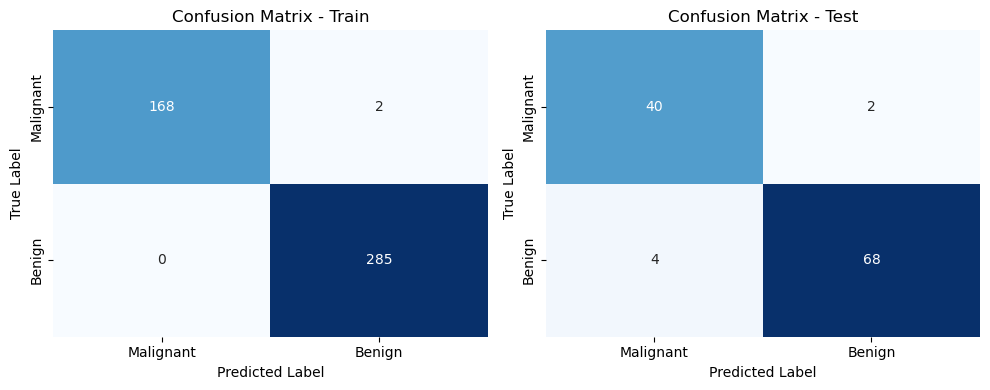

array([[168,   2],
       [  0, 285]])

array([[40,  2],
       [ 4, 68]])

In [18]:
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'], ax=axes[0])
axes[0].set_title('Confusion Matrix - Train')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'], ax=axes[1])
axes[1].set_title('Confusion Matrix - Test')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()

display(cm_train)
display(cm_test)

**Q2. Considerin class with label 0 to be malignant, from your confusion matrix, how many actually malignant cases were classified as benign?**
- 6
- 4
- 2
- 0

**Answer**: 2 

In [21]:
classification_report_train = classification_report(y_train, y_train_pred, target_names=['Malignant', 'Benign'])
classification_report_test = classification_report(y_test, y_test_pred, target_names=['Malignant', 'Benign'])

print("Classification Report - Train")
print(classification_report_train)
print("Classification Report - Test")
print(classification_report_test)

Classification Report - Train
              precision    recall  f1-score   support

   Malignant       1.00      0.99      0.99       170
      Benign       0.99      1.00      1.00       285

    accuracy                           1.00       455
   macro avg       1.00      0.99      1.00       455
weighted avg       1.00      1.00      1.00       455

Classification Report - Test
              precision    recall  f1-score   support

   Malignant       0.91      0.95      0.93        42
      Benign       0.97      0.94      0.96        72

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



In [23]:
train_roc_auc_score = roc_auc_score(y_train, y_train_proba)
test_roc_auc_score = roc_auc_score(y_test, y_test_proba)

print("ROC AUC Score - Train:", train_roc_auc_score)
print("ROC AUC Score - Test:", test_roc_auc_score)

ROC AUC Score - Train: 0.9992156862745097
ROC AUC Score - Test: 0.986111111111111


## Part-II

Specifically, for questions 4 and 5: 
- Install LightGBM if you have not already done so
- You may use pip install lightgbm in a regular Python environment
- You may use conda install -c conda-forge lightgbm if you are working in Anaconda 


Build a base LGBMClassifier() model
- Set class_weight = 'balanced'
- Set random_state = 9001 so that the results you obtain can be compared to ours
- Set verbose = -1
- Set n_estimators = 100
- Set max_depth = 2
- Set learning_rate = 0.1 


In [25]:
lgbm_model = LGBMClassifier(
                        n_estimators=100, 
                        max_depth=2, 
                        learning_rate=0.1,
                        class_weight='balanced',
                        random_state=9001,
                        verbose=-1)

Fit your model on the training data and evaluate it on the testing data 


In [26]:
lgbm_model.fit(X_train, y_train)

,boosting_type,'gbdt'
,num_leaves,31
,max_depth,2
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,'balanced'
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [28]:
y_train_lgbm_pred = lgbm_model.predict(X_train)
y_train_lgbm_proba = lgbm_model.predict_proba(X_train)[:,1] # Probability of class 1 ("benign")

y_test_lgbm_pred = lgbm_model.predict(X_test)
y_test_lgbm_proba = lgbm_model.predict_proba(X_test)[:,1] # Probability of class 1 ("benign")

In [29]:
train_lgbm_accuracy = accuracy_score(y_train, y_train_lgbm_pred)
train_lgbm_precision = precision_score(y_train, y_train_lgbm_pred)
train_lgbm_recall = recall_score(y_train, y_train_lgbm_pred)
train_lgbm_f1 = f1_score(y_train, y_train_lgbm_pred)

test_lgbm_accuracy = accuracy_score(y_test, y_test_lgbm_pred)
test_lgbm_precision = precision_score(y_test, y_test_lgbm_pred)
test_lgbm_recall = recall_score(y_test, y_test_lgbm_pred)
test_lgbm_f1 = f1_score(y_test, y_test_lgbm_pred)

performance_lgbm_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Train': [train_lgbm_accuracy, train_lgbm_precision, train_lgbm_recall, train_lgbm_f1],
    'Test': [test_lgbm_accuracy, test_lgbm_precision, test_lgbm_recall, test_lgbm_f1]
})

display(performance_lgbm_df)

,Metric,Train,Test
0,Accuracy,1.0,0.947368
1,Precision,1.0,0.971429
2,Recall,1.0,0.944444
3,F1-Score,1.0,0.957746


During evaluation, generate
- A confusion matrix
- A classification report; you can use classification_report() from sklearn.metrics to achieve this
- The ROC AUC score; you can use roc_auc_score() from sklearn.metrics to achieve this 

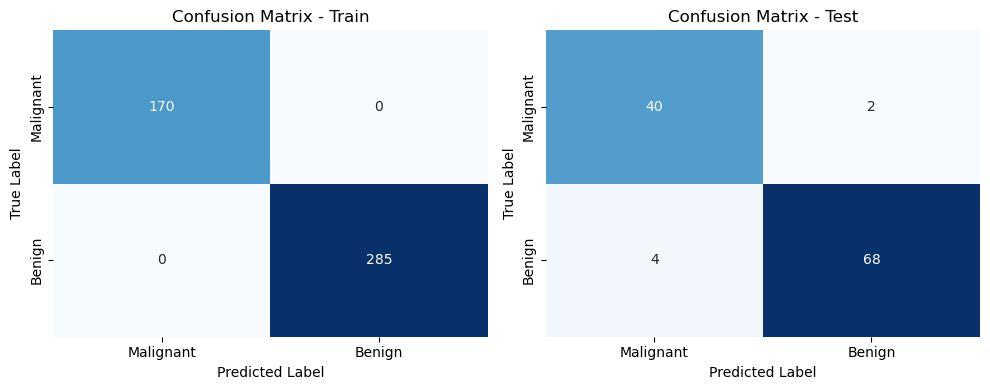

array([[170,   0],
       [  0, 285]])

array([[40,  2],
       [ 4, 68]])

In [30]:
cm_lgbm_train = confusion_matrix(y_train, y_train_lgbm_pred)
cm_lgbm_test = confusion_matrix(y_test, y_test_lgbm_pred)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.heatmap(cm_lgbm_train, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'], ax=axes[0])
axes[0].set_title('Confusion Matrix - Train')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

sns.heatmap(cm_lgbm_test, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'], ax=axes[1])
axes[1].set_title('Confusion Matrix - Test')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()

display(cm_lgbm_train)
display(cm_lgbm_test)

In [31]:
train_lgbm_roc_auc_score = roc_auc_score(y_train, y_train_lgbm_proba)
test_lgbm_roc_auc_score = roc_auc_score(y_test, y_test_lgbm_proba)

print("ROC AUC Score - Train:", train_lgbm_roc_auc_score)
print("ROC AUC Score - Test:", test_lgbm_roc_auc_score)

ROC AUC Score - Train: 1.0
ROC AUC Score - Test: 0.9837962962962963


**Q3. What is the difference between the confusion matrix obtained from Random Forest model and LightGBM model on the test set?** We are only concerned with counts and not actual data points.
- the confusion matrices are identical
- LightGBM model wrongly labelled one more non-cancerous case as cancerous compared to random forest model
- the random forest model wrongly babelled one more non-cancerous case as cancerous compared to LightGBM model
- LightGBM model wrongly labelled one more cancerous case as non-cancerous as compared to random forest model

**Answer:** the confusion matrices are identical

**Q4. What is ROC-AUC-score obtained from LightGBM model?**
- 0.98
- 0.92
- 0.87
- 0.84

**Answer:** 0.98

**Q5. What is the main difference between bagging and boosting?**
- a. Bagging builds model one after another, while boosting builds them at the same time
- b. Bagging combines many models trained independently, while boosting combines models that each try to fix the mistakes of the previous ones
- c. Both Bagging and Boosting can only be used with decision trees
- d. None of the above

**Answer: b.**

| Concept                 | **Bagging**                                                               | **Boosting**                                                                                      |
| ----------------------- | ------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------- |
| **Training**            | Models are trained **in parallel** (independently).                       | Models are trained **sequentially** — each new model focuses on errors made by the previous ones. |
| **Goal**                | Reduce **variance** (stabilize high-variance models like decision trees). | Reduce **bias** (improve weak learners by correcting errors).                                     |
| **Example algorithms**  | Random Forest, Bagged Trees                                               | AdaBoost, Gradient Boosting, XGBoost, LightGBM                                                    |
| **Weights on models**   | All models get **equal weight** in voting/averaging.                      | Later models get **higher weight** if they perform better.                                        |
| **Risk of overfitting** | Lower                                                                     | Higher (if not tuned properly)                                                                    |


**Q6. What is random forest in ML?**
- a. A single large decision tree trained on entire dataset
- b. A method that randomly plants virtual "trees" in a database to store information
- c. A collection of many decision trees where each tree is trained on a random sample of the data and features
- d. A technique that chooses the best single tree out of hundreds and discards the rest

**Answer: c**